In [2]:

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

In [3]:
# Set random seed for reproducibility
np.random.seed(42)
keras.utils.set_random_seed(42)

In [4]:
# Load and prepare data

(x_train, y_train), (x_test, y_test) = mnist.load_data()
    
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
    
# Reshape images to 1D vectors (28x28 = 784)
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))
    
# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
    
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


Training data shape: (60000, 784)
Test data shape: (10000, 784)


In [5]:
def preprocess_image(image_path):
    try:
        img = Image.open(image_path).convert('L')  # Convert to grayscale
        
        # Apply advanced preprocessing
        img = img.resize((28, 28), Image.LANCZOS)  # High-quality resizing
        img = ImageOps.invert(img)  # Invert colors (MNIST style)
        
        # Apply thresholding to enhance contrast
        img = img.point(lambda x: 0 if x < 30 else 255)  # Adjust threshold as needed
        
        # Apply slight blur to reduce noise
        img = img.filter(ImageFilter.GaussianBlur(radius=0.5))
        
        # Normalize and reshape
        img_array = np.array(img) / 255.0
        img_array = img_array.reshape(1, 784)
        
        return img_array
    except Exception as e:
        print(f"Error preprocessing image: {e}")
        return None

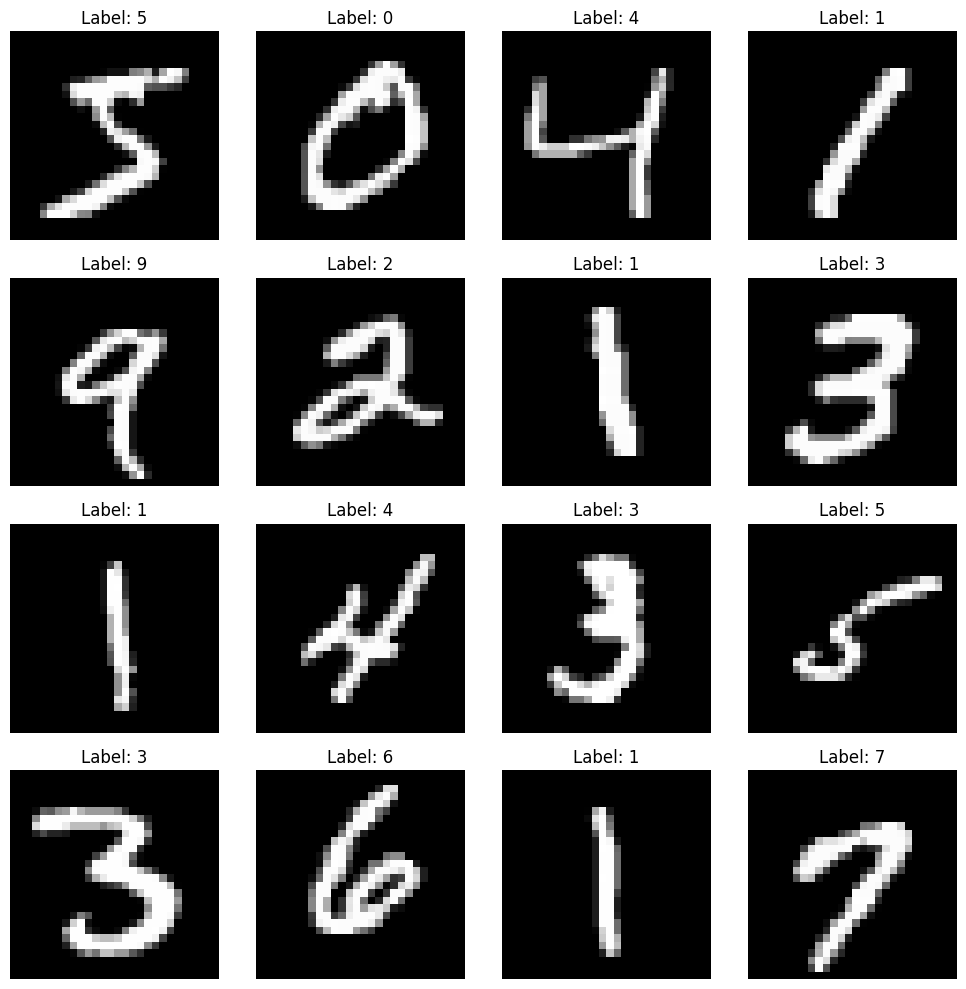

In [6]:
# Visualize dataset samples
def visualize_samples(x, y, num_samples=16):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(4, 4, i+1)
        plt.imshow(x[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {np.argmax(y[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
visualize_samples(x_train, y_train)

In [7]:
# Build improved CNN model
from keras.layers import Reshape, Conv2D, MaxPooling2D, Flatten

def build_cnn_model():
    model = Sequential([
        Reshape((28, 28, 1), input_shape=(784,)),  # Reshape for CNN
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

model = build_cnn_model()
model.summary()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,330 (1.50 MB)

 Trainable params: 391,370 (1.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [8]:
# Set up callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_mnist_model.keras', 
                   monitor='val_accuracy', 
                   save_best_only=True)
]

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=50,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 70ms/step - accuracy: 0.8275 - loss: 0.5760 - val_accuracy: 0.1128 - val_loss: 3.9427
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9696 - loss: 0.0960 - val_accuracy: 0.9815 - val_loss: 0.0573
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.9775 - loss: 0.0710 - val_accuracy: 0.9893 - val_loss: 0.0366
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.9827 - loss: 0.0565 - val_accuracy: 0.9898 - val_loss: 0.0343
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.9843 - loss: 0.0489 - val_accuracy: 0.9895 - val_loss: 0.0354
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.9869 - loss: 0.0409 - val_accuracy: 0.9921 - val_loss: 0.0289
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9872 - loss: 0.0382 - val_accuracy: 0.9905 - val_loss: 0.0300
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.9883 - loss: 0.0361 - 

In [9]:
# Plot training history
def plot_history(history):
 plt.figure(figsize=(12, 5))


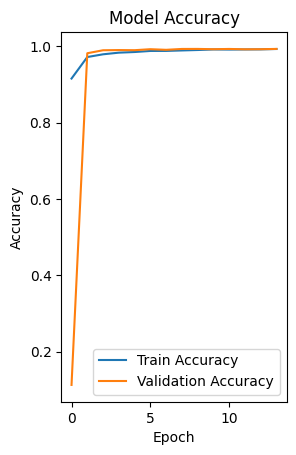

In [10]:

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

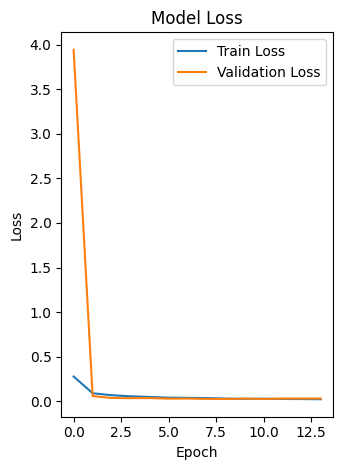

In [11]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
    
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



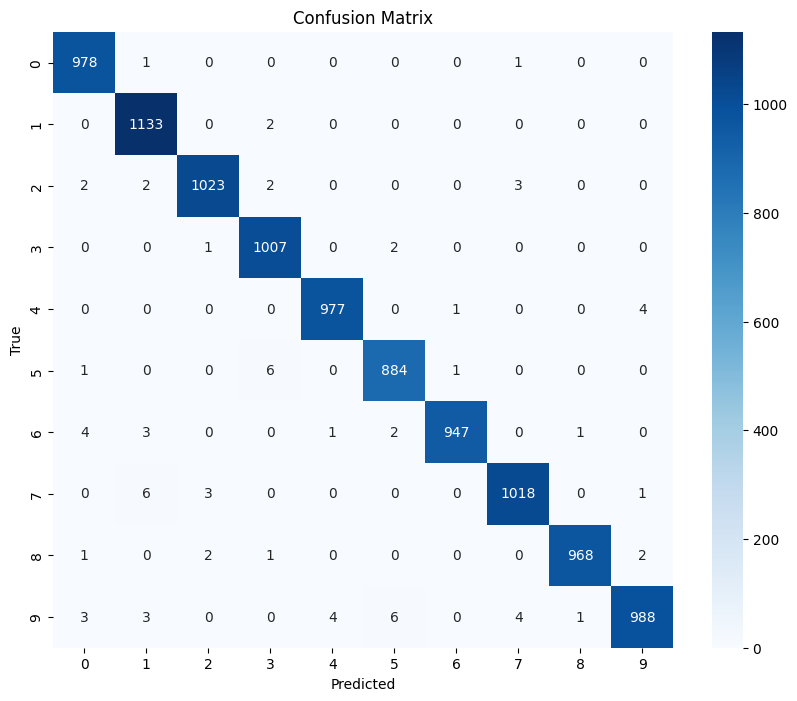

In [12]:
# Evaluate model performance
def evaluate_model(model, x_test, y_test):
    # Get predictions
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes))
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=range(10), yticklabels=range(10))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
   
evaluate_model(model, x_test, y_test)

In [13]:
# Interactive prediction explorer
def display_prediction(index):
    sample = x_test[index].reshape(28, 28)
    prediction = model.predict(x_test[index:index+1])
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(sample, cmap='gray')
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2%}")
    plt.axis('off')
    plt.show()
    
    # Show prediction probabilities
    plt.figure(figsize=(10, 4))
    plt.bar(range(10), prediction[0], color='skyblue')
    plt.xticks(range(10))
    plt.title('Prediction Probabilities')
    plt.xlabel('Digit')
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    plt.show()

# Create interactive widget
index_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(x_test)-1,
    step=1,
    description='Test Sample:',
    continuous_update=False
)

widgets.interactive(display_prediction, index=index_slider)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Test Sample:', max=9999), Outpu…

In [14]:
# Save the final model
model.save('mnist_digit_classifier_final.keras')
print("Model saved as 'mnist_digit_classifier_final.keras'")

Model saved as 'mnist_digit_classifier_final.keras'
